### Exp_3_MAS_explains_BB


In [1]:
# import required packages
import pandas as pd
import numpy as np

import joblib

import api_calls
from api_calls import *

import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix

#from pandas import json_normalize
import warnings
import requests
from requests import get
import time

from mycbr_py_api import MyCBRRestApi as mycbr

In [4]:
warnings.filterwarnings("ignore")

# Variables that are related to current CBR project
concept = 'wine' 

# API connection

server = 'localhost'
#server = 'user@hv-6066.idi.ntnu.no'

port = '8080'
base_url = 'http://' + server + ':' + port + '/'

headers = {'Content-type':'application/json'}

obj = mycbr(base_url)

# Confidence scores of CBR agents 
#(Confidence valeus calculated in exp_2 and treshold value determined manually according to system performance)
confidence = [0.13, 0.79, 0.43]
conf_tresh = 0.5

In [6]:
# Read data 
train = pd.read_csv('./data/train.csv') 
test = pd.read_csv('./data/test.csv')

label = 'quality'

train_X, train_y = train.drop([label],axis=1), train[label]
test_X, test_y = test.drop([label],axis=1), test[label]

### Load black-box model

In [8]:
bb_model = joblib.load("./model/MLP.pkl")

### Build 3 agents CBR system

In [9]:
def retrieve_cases(df):
    c0= obj.getCaseByCaseID(df.caseID_c0[0],concept,'cb_class0')
    c0['Class'] = 0
    c0['Similarity'] = df.similarity_c0[0]
    c0['Support'] = None

    c1 = obj.getCaseByCaseID(df.caseID_c1[0],concept,'cb_class1')
    c1['Class'] = 1
    c1['Similarity'] = df.similarity_c1[0]
    c1['Support'] = None

    c2 = obj.getCaseByCaseID(df.caseID_c2[0],concept,'cb_class2')
    c2['Class'] = 2
    c2['Similarity'] = df.similarity_c2[0]
    c2['Support'] = None

    res = c0
    res = res.append([c1,c2])
    return res.reset_index()


# row is a test sample (without Target)
def comparison(row):
    # Prediction of model
    bb_pred =  bb_model.predict([row])[0]
    
    # query the case in 3 cb
    #row['Matched'] = calculateMatched(row)
    cbr_sim = query_all_cbr_systems(concept,  row, k=1)
        
    # Retrieve closest cases from cb
    cases = retrieve_cases(cbr_sim)
    # Cbr prediction result
    cbr_pred = get_class_from_cbr_results(cbr_sim.loc[0])
    

    # Return a Contrastive or Supportive explanation case 
    exp_case = pd.DataFrame()
    if bb_pred != cbr_pred and confidence[cbr_pred] > conf_tresh:
        exp_case = cases.loc[cbr_pred]
        exp_case.Support = 'Contrastive'
    else: 
        exp_case = cases.loc[bb_pred]
        exp_case.Support = 'Supportive'

    exp_case['bb'] = bb_pred
    
    return exp_case.drop(['index'])

In [10]:
for idx in range(len(test)):
    exp = comparison(test_X.loc[idx])
    print('------------------- Query_{} -------------------'.format(idx))
    print('The Black-box predicts class {}'.format(exp.bb))
    print('The Multi-Agent CBR system returns "{}" with a similarity score {:.3f} as a {} case.\n\n'.format(exp.caseID, exp.Similarity, exp.Support.upper()))

------------------- Query_0 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1195.0" with a similarity score 0.985 as a SUPPORTIVE case.


------------------- Query_1 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2669.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_2 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3328.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_3 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1337.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_4 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_687.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_5 -------------------
The Black-box predicts class 1
The Multi-Ag

------------------- Query_45 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2864.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_46 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2156.0" with a similarity score 0.982 as a SUPPORTIVE case.


------------------- Query_47 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2255.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_48 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2946.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_49 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2279.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_50 -------------------
The Black-box predicts class 1
The M

------------------- Query_90 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1124.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_91 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3053.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_92 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3358.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_93 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2723.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_94 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2330.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_95 -------------------
The Black-box predicts class 1
The M

------------------- Query_135 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2883.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_136 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_198.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_137 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2047.0" with a similarity score 0.977 as a SUPPORTIVE case.


------------------- Query_138 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2559.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_139 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1799.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_140 -------------------
The Black-box predicts class 1


------------------- Query_180 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_345.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_181 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2081.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_182 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_677.0" with a similarity score 0.996 as a SUPPORTIVE case.


------------------- Query_183 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1106.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_184 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1304.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_185 -------------------
The Black-box predicts class 1
T

------------------- Query_225 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2877.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_226 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_232.0" with a similarity score 0.988 as a SUPPORTIVE case.


------------------- Query_227 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_131.0" with a similarity score 0.988 as a SUPPORTIVE case.


------------------- Query_228 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2488.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_229 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3243.0" with a similarity score 0.968 as a SUPPORTIVE case.


------------------- Query_230 -------------------
The Black-box predicts class 1
T

------------------- Query_270 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_912.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_271 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_946.0" with a similarity score 0.997 as a SUPPORTIVE case.


------------------- Query_272 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1162.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_273 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1757.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_274 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3350.0" with a similarity score 0.984 as a SUPPORTIVE case.


------------------- Query_275 -------------------
The Black-box predicts class 1
T

------------------- Query_315 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1108.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_316 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3056.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_317 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_453.0" with a similarity score 0.983 as a SUPPORTIVE case.


------------------- Query_318 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1862.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_319 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_518.0" with a similarity score 0.997 as a SUPPORTIVE case.


------------------- Query_320 -------------------
The Black-box predicts class 1
T

------------------- Query_360 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_106.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_361 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3220.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_362 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3074.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_363 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2043.0" with a similarity score 0.972 as a SUPPORTIVE case.


------------------- Query_364 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_274.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_365 -------------------
The Black-box predicts class 2
T

------------------- Query_405 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2327.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_406 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_919.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_407 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_679.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_408 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2988.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_409 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3094.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_410 -------------------
The Black-box predicts class 1
T

------------------- Query_450 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1818.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_451 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1501.0" with a similarity score 0.984 as a SUPPORTIVE case.


------------------- Query_452 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2729.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_453 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_958.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_454 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2718.0" with a similarity score 0.963 as a SUPPORTIVE case.


------------------- Query_455 -------------------
The Black-box predicts class 1


------------------- Query_495 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1546.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_496 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1685.0" with a similarity score 0.964 as a SUPPORTIVE case.


------------------- Query_497 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_547.0" with a similarity score 0.996 as a SUPPORTIVE case.


------------------- Query_498 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2094.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_499 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2979.0" with a similarity score 0.983 as a SUPPORTIVE case.


------------------- Query_500 -------------------
The Black-box predicts class 1


------------------- Query_540 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1377.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_541 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3088.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_542 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1045.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_543 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3034.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_544 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2019.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_545 -------------------
The Black-box predicts class 1

------------------- Query_585 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1406.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_586 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_822.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_587 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_12.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_588 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1055.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_589 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3498.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_590 -------------------
The Black-box predicts class 1
Th

------------------- Query_630 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3272.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_631 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1733.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_632 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2922.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_633 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1995.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_634 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2358.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_635 -------------------
The Black-box predicts class 1

------------------- Query_675 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3420.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_676 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2515.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_677 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2060.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_678 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_672.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_679 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2500.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_680 -------------------
The Black-box predicts class 1


------------------- Query_720 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1933.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_721 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2433.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_722 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_788.0" with a similarity score 0.982 as a SUPPORTIVE case.


------------------- Query_723 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1642.0" with a similarity score 1.000 as a SUPPORTIVE case.


------------------- Query_724 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3126.0" with a similarity score 0.984 as a SUPPORTIVE case.


------------------- Query_725 -------------------
The Black-box predicts class 1


------------------- Query_765 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_877.0" with a similarity score 0.975 as a SUPPORTIVE case.


------------------- Query_766 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1780.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_767 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1339.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_768 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3272.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_769 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2885.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_770 -------------------
The Black-box predicts class 1


------------------- Query_810 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3083.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_811 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3471.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_812 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1137.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_813 -------------------
The Black-box predicts class 2
The Multi-Agent CBR system returns "case_803.0" with a similarity score 0.979 as a SUPPORTIVE case.


------------------- Query_814 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3249.0" with a similarity score 0.973 as a SUPPORTIVE case.


------------------- Query_815 -------------------
The Black-box predicts class 1


------------------- Query_855 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3020.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_856 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_274.0" with a similarity score 0.999 as a SUPPORTIVE case.


------------------- Query_857 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1614.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_858 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_867.0" with a similarity score 0.988 as a SUPPORTIVE case.


------------------- Query_859 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1891.0" with a similarity score 0.983 as a SUPPORTIVE case.


------------------- Query_860 -------------------
The Black-box predicts class 1
T

------------------- Query_900 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_585.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_901 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3484.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_902 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1852.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_903 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2672.0" with a similarity score 0.997 as a SUPPORTIVE case.


------------------- Query_904 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3013.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_905 -------------------
The Black-box predicts class 1


------------------- Query_945 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1527.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_946 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2722.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_947 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2103.0" with a similarity score 0.997 as a SUPPORTIVE case.


------------------- Query_948 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_758.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_949 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1787.0" with a similarity score 0.999 as a SUPPORTIVE case.


------------------- Query_950 -------------------
The Black-box predicts class 1


------------------- Query_990 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3407.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_991 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2041.0" with a similarity score 0.983 as a SUPPORTIVE case.


------------------- Query_992 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_130.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_993 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_640.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_994 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_191.0" with a similarity score 0.999 as a SUPPORTIVE case.


------------------- Query_995 -------------------
The Black-box predicts class 1
Th

------------------- Query_1035 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_669.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1036 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_211.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_1037 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1797.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_1038 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2668.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_1039 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2004.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1040 -------------------
The Black-box predicts cla

------------------- Query_1080 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1043.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_1081 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_202.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_1082 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1347.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1083 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_935.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_1084 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3000.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_1085 -------------------
The Black-box predicts cla

------------------- Query_1125 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1946.0" with a similarity score 0.982 as a SUPPORTIVE case.


------------------- Query_1126 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_658.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1127 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3049.0" with a similarity score 1.000 as a SUPPORTIVE case.


------------------- Query_1128 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2387.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_1129 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_280.0" with a similarity score 0.999 as a SUPPORTIVE case.


------------------- Query_1130 -------------------
The Black-box predicts cla

------------------- Query_1170 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3110.0" with a similarity score 0.981 as a SUPPORTIVE case.


------------------- Query_1171 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1706.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1172 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2713.0" with a similarity score 0.996 as a SUPPORTIVE case.


------------------- Query_1173 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_410.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_1174 -------------------
The Black-box predicts class 2
The Multi-Agent CBR system returns "case_419.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_1175 -------------------
The Black-box predicts cla

------------------- Query_1215 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2380.0" with a similarity score 0.964 as a SUPPORTIVE case.


------------------- Query_1216 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1936.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_1217 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_505.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1218 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3139.0" with a similarity score 0.978 as a SUPPORTIVE case.


------------------- Query_1219 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1156.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1220 -------------------
The Black-box predicts cl

------------------- Query_1260 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3119.0" with a similarity score 0.984 as a SUPPORTIVE case.


------------------- Query_1261 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2599.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1262 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_524.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_1263 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1740.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1264 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1724.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_1265 -------------------
The Black-box predicts cl

------------------- Query_1305 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_263.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_1306 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_169.0" with a similarity score 0.981 as a SUPPORTIVE case.


------------------- Query_1307 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1846.0" with a similarity score 0.982 as a SUPPORTIVE case.


------------------- Query_1308 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3284.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_1309 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_751.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_1310 -------------------
The Black-box predicts clas

------------------- Query_1350 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2555.0" with a similarity score 0.997 as a SUPPORTIVE case.


------------------- Query_1351 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2361.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1352 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1447.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_1353 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1576.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_1354 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1236.0" with a similarity score 0.987 as a SUPPORTIVE case.


------------------- Query_1355 -------------------
The Black-box predicts c

------------------- Query_1395 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2971.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1396 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3253.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_1397 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_466.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1398 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_656.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_1399 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1650.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_1400 -------------------
The Black-box predicts cla

------------------- Query_1440 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2878.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1441 -------------------
The Black-box predicts class 2
The Multi-Agent CBR system returns "case_72.0" with a similarity score 0.984 as a SUPPORTIVE case.


------------------- Query_1442 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1203.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_1443 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1847.0" with a similarity score 0.988 as a SUPPORTIVE case.


------------------- Query_1444 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2010.0" with a similarity score 0.996 as a SUPPORTIVE case.


------------------- Query_1445 -------------------
The Black-box predicts cla

------------------- Query_1485 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1595.0" with a similarity score 0.983 as a SUPPORTIVE case.


------------------- Query_1486 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1487.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1487 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1121.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1488 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_377.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_1489 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1450.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1490 -------------------
The Black-box predicts cl

------------------- Query_1530 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3423.0" with a similarity score 0.997 as a SUPPORTIVE case.


------------------- Query_1531 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2919.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_1532 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1275.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1533 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1079.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1534 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_688.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_1535 -------------------
The Black-box predicts cl

------------------- Query_1575 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3317.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1576 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1579.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1577 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1782.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_1578 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_974.0" with a similarity score 0.997 as a SUPPORTIVE case.


------------------- Query_1579 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2625.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_1580 -------------------
The Black-box predicts cl

------------------- Query_1620 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1737.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1621 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1354.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_1622 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1712.0" with a similarity score 0.997 as a SUPPORTIVE case.


------------------- Query_1623 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3098.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_1624 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_500.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1625 -------------------
The Black-box predicts cl

------------------- Query_1665 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2562.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_1666 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1715.0" with a similarity score 0.984 as a SUPPORTIVE case.


------------------- Query_1667 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2474.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_1668 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_904.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1669 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_432.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_1670 -------------------
The Black-box predicts cla

------------------- Query_1710 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3434.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_1711 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2572.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_1712 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3429.0" with a similarity score 0.999 as a SUPPORTIVE case.


------------------- Query_1713 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2219.0" with a similarity score 0.959 as a SUPPORTIVE case.


------------------- Query_1714 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1929.0" with a similarity score 1.000 as a SUPPORTIVE case.


------------------- Query_1715 -------------------
The Black-box predicts c

------------------- Query_1755 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_155.0" with a similarity score 0.993 as a SUPPORTIVE case.


------------------- Query_1756 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1606.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_1757 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2929.0" with a similarity score 0.991 as a SUPPORTIVE case.


------------------- Query_1758 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2204.0" with a similarity score 1.000 as a SUPPORTIVE case.


------------------- Query_1759 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1452.0" with a similarity score 0.999 as a SUPPORTIVE case.


------------------- Query_1760 -------------------
The Black-box predicts cl

------------------- Query_1800 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2215.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_1801 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_654.0" with a similarity score 0.967 as a SUPPORTIVE case.


------------------- Query_1802 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2381.0" with a similarity score 0.977 as a SUPPORTIVE case.


------------------- Query_1803 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_506.0" with a similarity score 0.995 as a SUPPORTIVE case.


------------------- Query_1804 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1776.0" with a similarity score 0.988 as a SUPPORTIVE case.


------------------- Query_1805 -------------------
The Black-box predicts cla

------------------- Query_1845 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2488.0" with a similarity score 0.988 as a SUPPORTIVE case.


------------------- Query_1846 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2182.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1847 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2114.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1848 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_445.0" with a similarity score 0.988 as a SUPPORTIVE case.


------------------- Query_1849 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1844.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_1850 -------------------
The Black-box predicts cl

------------------- Query_1890 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_610.0" with a similarity score 0.996 as a SUPPORTIVE case.


------------------- Query_1891 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1617.0" with a similarity score 1.000 as a SUPPORTIVE case.


------------------- Query_1892 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_669.0" with a similarity score 0.996 as a SUPPORTIVE case.


------------------- Query_1893 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1952.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1894 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2848.0" with a similarity score 0.992 as a SUPPORTIVE case.


------------------- Query_1895 -------------------
The Black-box predicts cla

------------------- Query_1935 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1310.0" with a similarity score 0.986 as a SUPPORTIVE case.


------------------- Query_1936 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_569.0" with a similarity score 0.998 as a SUPPORTIVE case.


------------------- Query_1937 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_2430.0" with a similarity score 0.989 as a SUPPORTIVE case.


------------------- Query_1938 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_3376.0" with a similarity score 0.990 as a SUPPORTIVE case.


------------------- Query_1939 -------------------
The Black-box predicts class 1
The Multi-Agent CBR system returns "case_1955.0" with a similarity score 0.994 as a SUPPORTIVE case.


------------------- Query_1940 -------------------
The Black-box predicts cl

### Comparing the query  with the most similar case

In [11]:
idx = 12

exp = comparison(test_X.loc[idx])
exp2 = pd.DataFrame(exp.drop(['caseID','Class','Support'])).T
q = pd.DataFrame(test_X.loc[idx]).T
q = q.astype(float)
exp2 = exp2.astype(float)

res = q.append(exp2)
res.index = ['query','similar case']

print('Attributes that differ between the query and the most similar case')
res[res.diff() != 0].dropna(axis=1)

Attributes that differ between the query and the most similar case


,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates
query,6.0,0.21,12.1,0.050,164.0,0.9970,3.34,0.39
similar case,5.8,0.26,9.2,0.044,152.0,0.9961,3.31,0.38


In [12]:
print('Attributes that are the same for the query and the most similar case')
res[res.diff() != 1].dropna(axis=1)

Attributes that are the same for the query and the most similar case


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
query,6.0,0.21,0.24,12.1,0.050,55.0,164.0,0.9970,3.34,0.39,9.4,1.0
similar case,5.8,0.26,0.24,9.2,0.044,55.0,152.0,0.9961,3.31,0.38,9.4,1.0


In [13]:
print('Complete comparison of query and the most similar case')


Complete comparison of query and the most similar case


<AxesSubplot: >

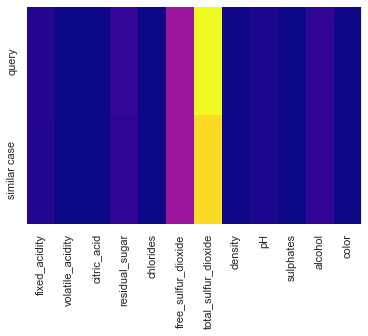

In [14]:
sns.set(rc = {'figure.figsize':(30,2)})
sns.heatmap(res.drop(['Similarity', 'bb'], axis = 1), cmap='plasma', cbar=False)

In [15]:
idx = 13

exp = comparison(test_X.loc[idx])
exp2 = pd.DataFrame(exp.drop(['caseID','Class','Support'])).T
q = pd.DataFrame(test_X.loc[idx]).T
q = q.astype(float)
exp2 = exp2.astype(float)

res = q.append(exp2)
res.index = ['query','similar case']

print('Attributes that differ between the query and the most similar case')
res[res.diff() != 0].dropna(axis=1)

Attributes that differ between the query and the most similar case


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
query,5.4,0.46,0.15,2.1,0.026,130.0,0.98953,3.39,0.77,13.4,1.0
similar case,5.0,0.40,0.50,4.3,0.046,80.0,0.99020,3.49,0.66,13.6,0.0


In [16]:
print('Attributes that are the same for the query and the most similar case')
res[res.diff() != 1].dropna(axis=1)

Attributes that are the same for the query and the most similar case


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
query,5.4,0.46,0.15,2.1,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,1.0
similar case,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,0.0


In [17]:
print('Complete comparison of query and the most similar case')


Complete comparison of query and the most similar case


<AxesSubplot: >

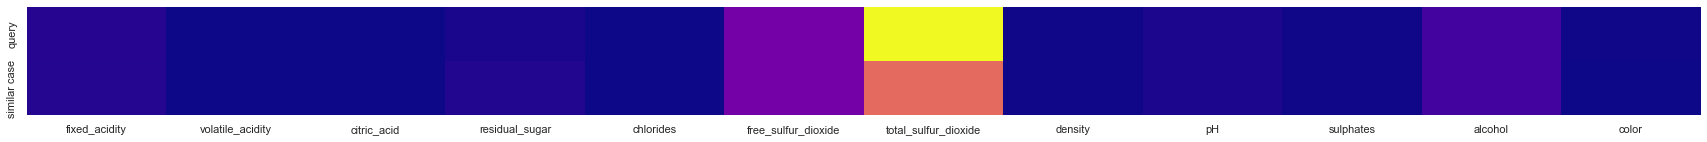

In [18]:
sns.set(rc = {'figure.figsize':(30,2)})
sns.heatmap(res.drop(['Similarity', 'bb'], axis = 1), cmap='plasma', cbar=False)